**** Passengers Survival prediction using Logistic regression model **
* Reading the data
* Exploratory Data analysis
* Converting categorical features
* Building a Logistic Regression Model
* Prediction and evaluation(Result providing the accuracy of 86%)

Please upvote if you like the implemenattion


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start by reading in the csv file into a pandas dataframe.

In [2]:
df=pd.read_csv('../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

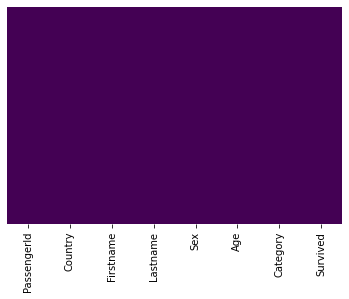

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

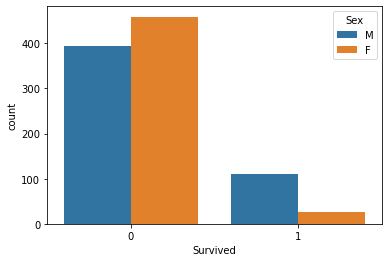

In [4]:
sns.countplot(x='Survived',data=df,hue='Sex')

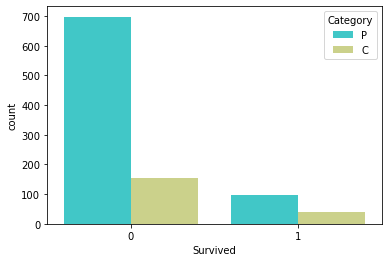

In [5]:
sns.countplot(x='Survived',hue='Category',data=df,palette='rainbow')

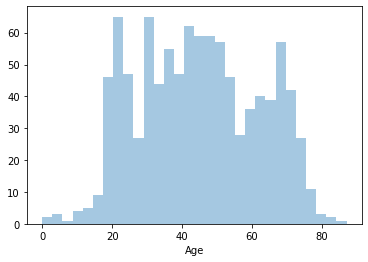

In [6]:
sns.distplot(df['Age'],kde=False,bins=30)

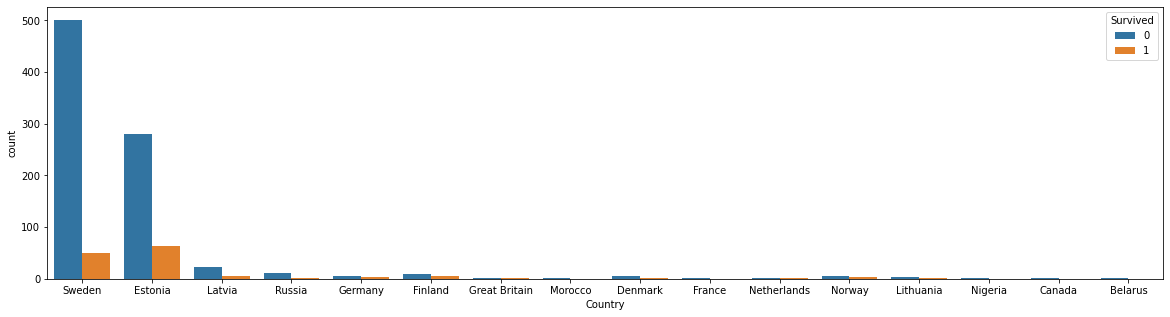

In [7]:
plt.subplots(figsize=(20,5))
sns.countplot(x='Country',data=df,hue='Survived')

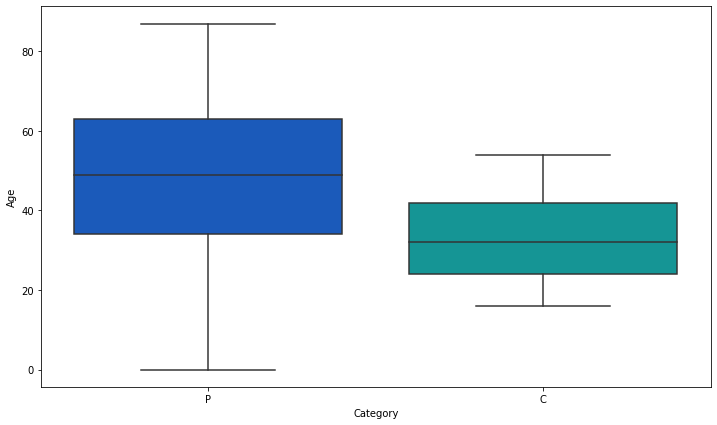

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category',y='Age',data=df,palette='winter')

We can see the passenger in 'P' category tend to be older

## Converting Categorical Features 

We'll need to convert categorical features to variables using map function! Otherwise our 
machine learning algorithm won't be able to directly take in those features as inputs.

In [9]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [10]:
df['Category']=df['Category'].map({'P':1,'C':2})
df['Sex']=df['Sex'].map({'M':1,'F':2})

In [11]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,1,62,1,0
1,2,Estonia,LEA,AALISTE,2,22,2,0
2,3,Estonia,AIRI,AAVASTE,2,21,2,0
3,4,Sweden,JURI,AAVIK,1,53,2,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,2,55,1,0


mapped Sex and category column to 1 & 2 

In [12]:
df.drop(['Country','Firstname','Lastname'],axis=1,inplace=True)

In [13]:
df.head()

,PassengerId,Sex,Age,Category,Survived
0,1,1,62,1,0
1,2,2,22,2,0
2,3,2,21,2,0
3,4,1,53,2,0
4,5,2,55,1,0


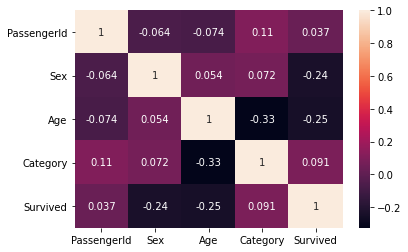

In [15]:
sns.heatmap(df.corr(),annot=True)

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set 

## Train Test Split

In [16]:
df.shape

(989, 5)

In [17]:
from sklearn.model_selection import train_test_split
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, 
                                                    random_state=101)

## Training and Predicting

In [18]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [19]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       173
           1       0.00      0.00      0.00        25

    accuracy                           0.86       198
   macro avg       0.44      0.49      0.46       198
weighted avg       0.76      0.86      0.81       198



In [21]:
print(confusion_matrix(y_test,predictions))

[[171   2]
 [ 25   0]]


please do  Upvote !!!:-)